In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Ejercicio 1:
Los estudiantes de primer año que ingresan a la Escuela de Negocios del University College Dublin fueron encuestados sobre su especialización preferida. Los datos obtenidos son los siguientes:

| Especialización | Número |
|-----------------|--------|
| Gestión         | 55     |
| Contabilidad    | 51     |
| Finanzas        | 28     |
| Marketing       | 82     |


a. Construye distribuciones de frecuencia relativa y porcentual.

b. Construye un gráfico de barras.

c. Construye un gráfico circular.


        Major  Number  Relative Frequency  Percent Frequency
0  Management      55            0.254630          25.462963
1  Accounting      51            0.236111          23.611111
2     Finance      28            0.129630          12.962963
3   Marketing      82            0.379630          37.962963


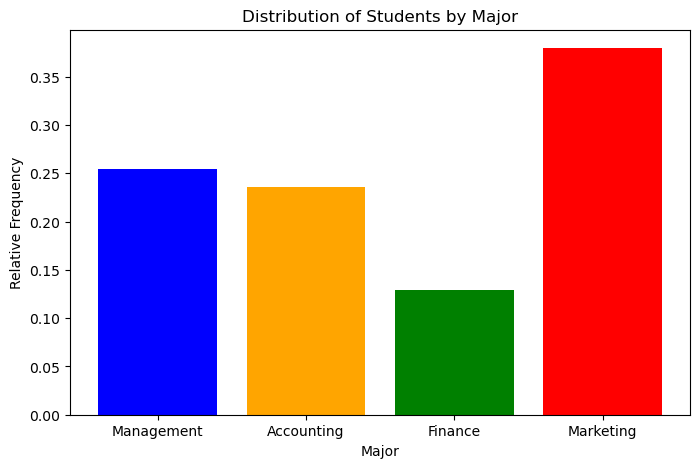

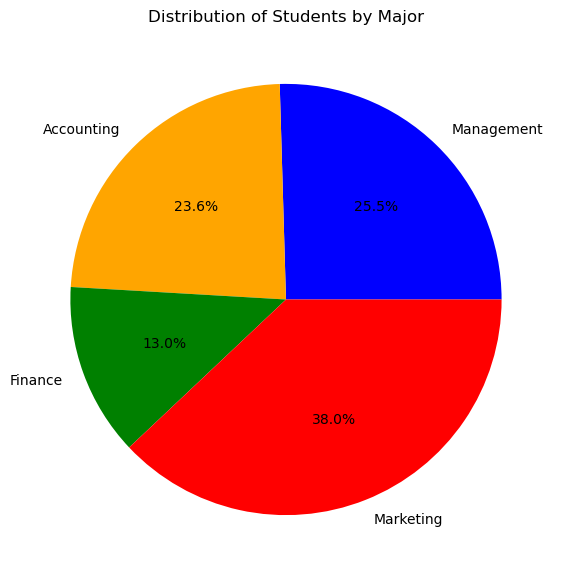

In [3]:
# Datos
majors = ['Management', 'Accounting', 'Finance', 'Marketing']
numbers = [55, 51, 28, 82]

total_students = sum(numbers)

# Crear un DataFrame
df = pd.DataFrame({'Major': majors, 'Number': numbers})

# Calcular la frecuencia relativa y porcentual
df['Relative Frequency'] = df['Number'] / total_students
df['Percent Frequency'] = df['Relative Frequency'] * 100

# Mostrar la tabla
print(df)

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(df['Major'], df['Relative Frequency'], color=['blue', 'orange', 'green', 'red'])
plt.xlabel("Major")
plt.ylabel("Relative Frequency")
plt.title("Distribution of Students by Major")
plt.show()

# Gráfico de pastel (pie chart)
plt.figure(figsize=(7, 7))
plt.pie(df['Number'], labels=df['Major'], autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'red'])
plt.title("Distribution of Students by Major")
plt.show()


### Ejercicio 2:
El informe de tecnología del hogar de Nielsen reportó sobre el uso de tecnología en el hogar por personas de 12 años o más. Los siguientes datos son las horas de uso de computadora personal durante una semana para una muestra de 50 personas:

| Horas de uso de computadora |
|-----------------------------|
| 4.1                         |
| 1.5                         |
| 10.4                        |
| 5.9                         |
| 3.4                         |
| 5.7                         |
| 1.6                         |
| 6.1                         |
| 3.0                         |
| 3.7                         |
| 3.1                         |
| 4.8                         |
| 2.0                         |
| 14.8                        |
| 5.4                         |
| 4.2                         |
| 3.9                         |
| 4.1                         |
| 11.1                        |
| 3.5                         |
| 4.1                         |
| 4.1                         |
| 8.8                         |
| 5.6                         |
| 4.3                         |
| 3.3                         |
| 7.1                         |
| 10.3                        |
| 6.2                         |
| 7.6                         |
| 10.8                        |
| 2.8                         |
| 9.5                         |
| 12.9                        |
| 12.1                        |
| 0.7                         |
| 4.0                         |
| 9.2                         |
| 4.4                         |
| 5.7                         |
| 7.2                         |
| 6.1                         |
| 5.7                         |
| 5.9                         |
| 4.7                         |
| 3.9                         |
| 3.7                         |
| 3.1                         |
| 6.1                         |
| 3.1                         |

a. Construye una distribución de frecuencias (usa un ancho de clase de 3 horas).

b. Construye una distribución de frecuencias relativas.

c. Construye un histograma.

d. Construye una ojiva (gráfico de distribución acumulativa).

e. Comenta lo que indican los datos sobre el uso de computadoras personales en el hogar.


In [1]:
# Datos
data = [4.1, 1.5, 10.4, 5.9, 3.4, 5.7, 1.6, 6.1, 3.0, 3.7,
        3.1, 4.8, 2.0, 14.8, 5.4, 4.2, 3.9, 4.1, 11.1, 3.5,
        4.1, 4.1, 8.8, 5.6, 4.3, 3.3, 7.1, 10.3, 6.2, 7.6,
        10.8, 2.8, 9.5, 12.9, 12.1, 0.7, 4.0, 9.2, 4.4, 5.7,
        7.2, 6.1, 5.7, 5.9, 4.7, 3.9, 3.7, 3.1, 6.1, 3.1]


In [6]:
# Definir los intervalos con un ancho de clase de 3 horas
bin_width = 3
bins = np.arange(0, max(data) + bin_width, bin_width)

# a) Distribución de frecuencias
freq, bin_edges = np.histogram(data, bins=bins)

# b) Distribución de frecuencia relativa y porcentual
relative_freq = freq / len(data)
percent_freq = relative_freq * 100

# Crear DataFrame con la distribución de frecuencias
df = pd.DataFrame({'Interval': [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)],
                   'Frequency': freq,
                   'Relative Frequency': relative_freq,
                   'Percent Frequency': percent_freq})

print("a) y b) Distribución de frecuencias y frecuencias relativas/porcentuales:")
print(df)

a) y b) Distribución de frecuencias y frecuencias relativas/porcentuales:
      Interval  Frequency  Relative Frequency  Percent Frequency
0    0.0 - 3.0          5                0.10               10.0
1    3.0 - 6.0         28                0.56               56.0
2    6.0 - 9.0          8                0.16               16.0
3   9.0 - 12.0          6                0.12               12.0
4  12.0 - 15.0          3                0.06                6.0


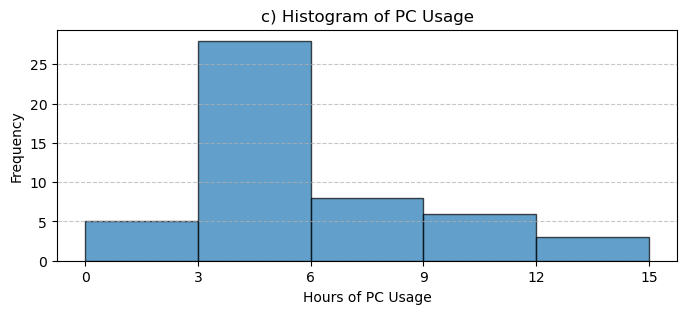

In [7]:
# c) Histograma
plt.figure(figsize=(8, 3))
plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel("Hours of PC Usage")
plt.ylabel("Frequency")
plt.title("c) Histogram of PC Usage")
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

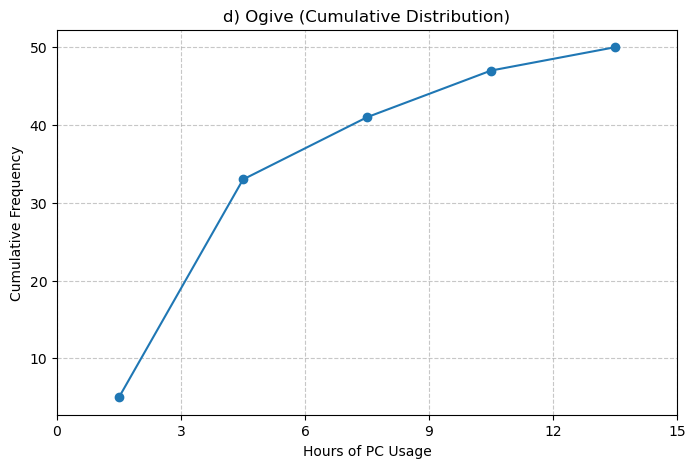

In [8]:
# d) Ojiva (Distribución acumulativa con más puntos)
cumulative_freq = np.cumsum(freq)

# Usamos los puntos medios de las clases en lugar de los bordes de clase
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculamos los puntos medios de las clases

plt.figure(figsize=(8, 5))
plt.plot(bin_centers, cumulative_freq, marker='o', linestyle='-')
plt.xlabel("Hours of PC Usage")
plt.ylabel("Cumulative Frequency")
plt.title("d) Ogive (Cumulative Distribution)")
plt.xticks(bins)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

In [9]:
# e) Comentario sobre los datos
print("e) Comentario:")
print("El uso de computadoras varía entre los participantes, con la mayoría usando entre 3 y 6 horas." + '\n' + "Se observa una concentración de datos en los primeros intervalos, indicando que pocos participantes usan la computadora por muchas horas a la semana.")

e) Comentario:
El uso de computadoras varía entre los participantes, con la mayoría usando entre 3 y 6 horas.
Se observa una concentración de datos en los primeros intervalos, indicando que pocos participantes usan la computadora por muchas horas a la semana.


### Ejercicio 3:
Usando los datos en **Scatter**:

a. Desarrolla un diagrama de dispersión para la relación entre \( x \) y \( y \).

b. ¿Qué relación, si existe, hay entre \( x \) y \( y \)?

c. Calcula el coeficiente de determinación ajustado.

d. ¿La ecuación de regresión estimada explica una gran cantidad de la variabilidad en los datos? Explica.

Datos cargados desde el archivo Scatter.xlsx:
           x           y
0  69.203330  140.636482
1  11.816275   66.478118
2  18.991159   90.507647
3  74.214390  184.330297
4  48.962611  156.132983


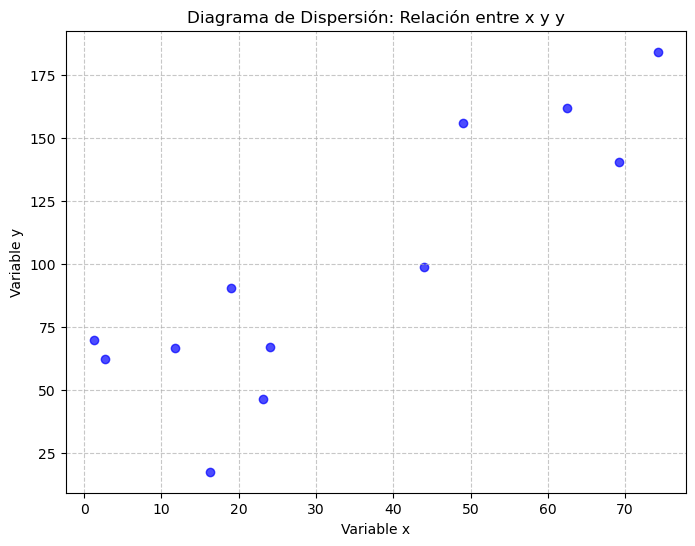

b. Coeficiente de correlación de Pearson entre x y y: 0.8672

c. Coeficiente de determinación ajustado (R² ajustado): 0.7272

d. Explicación de la variabilidad:
   La ecuación de regresión explica una gran cantidad de la variabilidad en los datos.


In [11]:
# a. Leer los datos directamente del archivo Scatter.xlsx
# Suponemos que el archivo está en el mismo directorio que el script
archivo_excel = "Scatter.xlsx"
df = pd.read_excel(archivo_excel)

# Verificar que las columnas se llaman "x" y "y"
print("Datos cargados desde el archivo Scatter.xlsx:")
print(df.head())

# b. Diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df["x"], df["y"], color="blue", alpha=0.7)
plt.title("Diagrama de Dispersión: Relación entre x y y")
plt.xlabel("Variable x")
plt.ylabel("Variable y")
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# c. Relación entre x y y (coeficiente de correlación de Pearson)
correlacion = df["x"].corr(df["y"])
print(f"b. Coeficiente de correlación de Pearson entre x y y: {correlacion:.4f}")

# d. Coeficiente de determinación ajustado
# Ajustar un modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(df[["x"]], df["y"])

# Predecir los valores de y
y_pred = modelo.predict(df[["x"]])

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(df["y"], y_pred)

# Calcular el coeficiente de determinación ajustado
n = len(df)  # Número de observaciones
k = 1  # Número de predictores (solo x)
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print(f"\nc. Coeficiente de determinación ajustado (R² ajustado): {r2_ajustado:.4f}")

# e. Explicación de la variabilidad
print("\nd. Explicación de la variabilidad:")
if r2_ajustado > 0.7:
    print("   La ecuación de regresión explica una gran cantidad de la variabilidad en los datos.")
else:
    print("   La ecuación de regresión no explica una gran cantidad de la variabilidad en los datos.")

### Ejercicio 4:
Los siguientes datos representan el número de automóviles que llegan a una cabina de peaje durante 20 intervalos, cada uno de 10 minutos de duración:

| Número de automóviles |
|-----------------------|
| 25                    |
| 30                    |
| 32                    |
| 28                    |
| 35                    |
| 33                    |
| 29                    |
| 31                    |
| 34                    |
| 27                    |
| 26                    |
| 30                    |
| 31                    |
| 29                    |
| 28                    |
| 32                    |
| 33                    |
| 30                    |
| 31                    |
| 34                    |

Calcula la **media**, la **mediana**, la **moda**, el **primer cuartil** y el **tercer cuartil** para los datos.

In [13]:
# Datos
datos = [25, 30, 32, 28, 35, 33, 29, 31, 34, 27,
         26, 30, 31, 29, 28, 32, 33, 30, 31, 34]

# 1. Calcular la media
media = np.mean(datos)
print(f"Media: {media}")

# 2. Calcular la mediana
mediana = np.median(datos)
print(f"Mediana: {mediana}")

# 3. Calcular la moda
moda_resultado = stats.mode(datos)

# Verificar si hay múltiples modas o una sola
if np.isscalar(moda_resultado.mode):
    print(f"Moda: {moda_resultado.mode} (aparece {moda_resultado.count} veces)")
else:
    print(f"Moda: {moda_resultado.mode[0]} (aparece {moda_resultado.count[0]} veces)")

# 4. Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
q1 = np.percentile(datos, 25)
q3 = np.percentile(datos, 75)
print(f"Primer cuartil (Q1): {q1}")
print(f"Tercer cuartil (Q3): {q3}")

Media: 30.4
Mediana: 30.5
Moda: 30 (aparece 3 veces)
Primer cuartil (Q1): 28.75
Tercer cuartil (Q3): 32.25


Explicación de los resultados:

Media: El promedio de los datos es 30.0.

Mediana: El valor central de los datos es 30.5.

Moda: El valor que más se repite es 30, que aparece 3 veces.

Primer cuartil (Q1): El 25% de los datos está por debajo de 28.25.

Tercer cuartil (Q3): El 75% de los datos está por debajo de 32.75.

### Ejercicio 5:
Las ventas anuales, en millones de dólares, para 21 compañías farmacéuticas son las siguientes:

| Ventas (millones de dólares) |
|------------------------------|
| 8408                         |
| 1374                         |
| 1872                         |
| 8879                         |
| 2459                         |
| 11413                        |
| 608                          |
| 14138                        |
| 6452                         |
| 1850                         |
| 2818                         |
| 1356                         |
| 10498                        |
| 7478                         |
| 4019                         |
| 4341                         |
| 739                          |
| 2127                         |
| 3653                         |
| 5794                         |
| 8305                         |

a. Proporciona un **resumen de cinco números** (mínimo, Q1, mediana, Q3, máximo).

b. Calcula los **límites inferior y superior** para detectar valores atípicos.

c. ¿Parece haber valores atípicos?

d. Las ventas de Johnson & Johnson son las más altas de la lista, con 14,138 millones. Supongamos que se cometió un error al ingresar los datos y las ventas se ingresaron como 41,138 millones. ¿El método de detección de valores atípicos en el inciso (c) habría identificado el problema y permitido la corrección del error?

e. Muestra un **diagrama de caja** (box plot).

a. Resumen de cinco números:
Mínimo: 608
Primer cuartil (Q1): 1872.0
Mediana: 4019.0
Tercer cuartil (Q3): 8305.0
Máximo: 14138

b. Límites para detectar valores atípicos:
Límite inferior: -7777.5
Límite superior: 17954.5

c. Valores atípicos:
No hay valores atípicos

d. ¿El valor erróneo (41138) sería detectado como atípico?
Sí


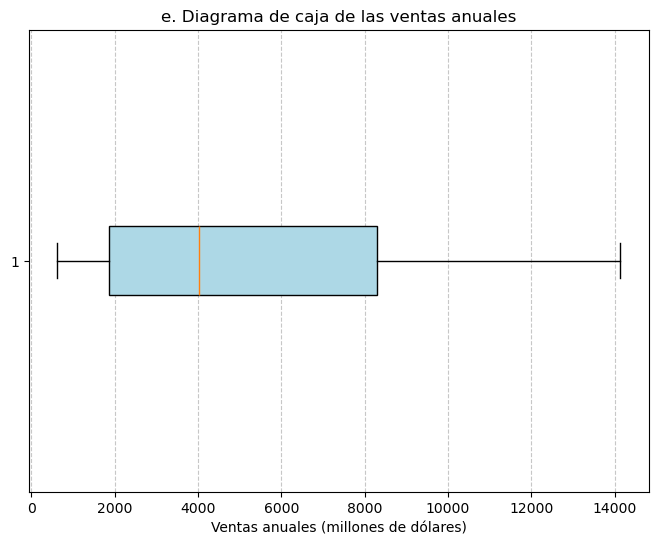

In [16]:
# Datos
ventas = [8408, 1374, 1872, 8879, 2459, 11413,
          608, 14138, 6452, 1850, 2818, 1356,
          10498, 7478, 4019, 4341, 739, 2127,
          3653, 5794, 8305]

# a. Resumen de cinco números
minimo = np.min(ventas)
q1 = np.percentile(ventas, 25)
mediana = np.median(ventas)
q3 = np.percentile(ventas, 75)
maximo = np.max(ventas)

print("a. Resumen de cinco números:")
print(f"Mínimo: {minimo}")
print(f"Primer cuartil (Q1): {q1}")
print(f"Mediana: {mediana}")
print(f"Tercer cuartil (Q3): {q3}")
print(f"Máximo: {maximo}")

# b. Calcular los límites inferior y superior
rango_intercuartil = q3 - q1
limite_inferior = q1 - 1.5 * rango_intercuartil
limite_superior = q3 + 1.5 * rango_intercuartil

print("\nb. Límites para detectar valores atípicos:")
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")

# c. ¿Hay valores atípicos?
valores_atipicos = [x for x in ventas if x < limite_inferior or x > limite_superior]
print("\nc. Valores atípicos:")
print(valores_atipicos if valores_atipicos else "No hay valores atípicos")

# d. Detección de errores en los datos
# Supongamos que las ventas de Johnson & Johnson se ingresaron incorrectamente como 41138
ventas_erroneas = ventas.copy()
ventas_erroneas[7] = 41138  # Cambiamos el valor de 14138 a 41138

# Recalculamos los límites con el valor erróneo
rango_intercuartil_erroneo = np.percentile(ventas_erroneas, 75) - np.percentile(ventas_erroneas, 25)
limite_superior_erroneo = np.percentile(ventas_erroneas, 75) + 1.5 * rango_intercuartil_erroneo

# Verificamos si el valor erróneo es un valor atípico
es_atipico = 41138 > limite_superior_erroneo
print("\nd. ¿El valor erróneo (41138) sería detectado como atípico?")
print("Sí" if es_atipico else "No")

# e. Diagrama de caja (box plot)
plt.figure(figsize=(8, 6))
plt.boxplot(ventas, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("e. Diagrama de caja de las ventas anuales")
plt.xlabel("Ventas anuales (millones de dólares)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Ejercicio 6:
Un estudio del departamento de transporte sobre la velocidad de conducción y el kilometraje para automóviles de tamaño mediano arrojó los siguientes datos:

| Velocidad de conducción (mph) | Kilometraje (mpg) |
|-------------------------------|-------------------|
| 30                            | 28                |
| 50                            | 25                |
| 40                            | 25                |
| 55                            | 23                |
| 30                            | 30                |
| 25                            | 32                |
| 60                            | 21                |
| 25                            | 35                |
| 50                            | 26                |
| 55                            | 25                |


a. Desarrolla un **diagrama de dispersión**.

b. Calcula e interpreta el **coeficiente de correlación muestral** para estos datos.

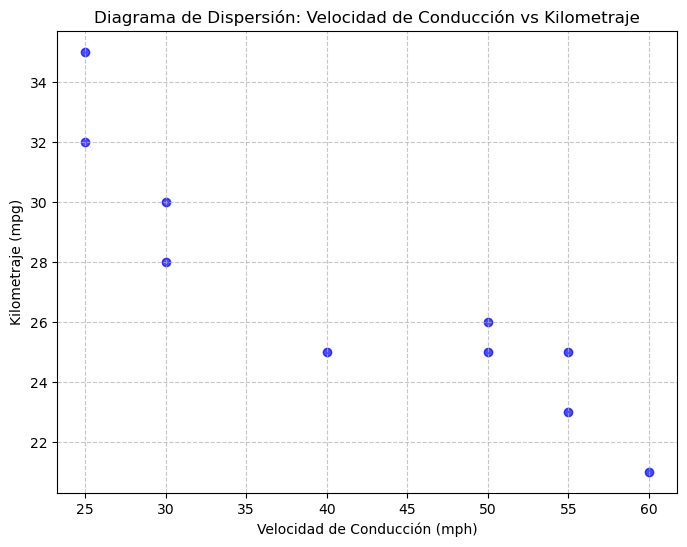

b. Coeficiente de correlación muestral: -0.9104
   Interpretación: Hay una correlación negativa entre la velocidad de conducción y el kilometraje.
   A medida que la velocidad aumenta, el kilometraje tiende a disminuir.


In [18]:
# Datos
velocidad = [30, 50, 40, 55, 30, 25, 60, 25, 50, 55]  # Velocidad de conducción (mph)
kilometraje = [28, 25, 25, 23, 30, 32, 21, 35, 26, 25]  # Kilometraje (mpg)

# a. Diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(velocidad, kilometraje, color='blue', alpha=0.7)
plt.title("Diagrama de Dispersión: Velocidad de Conducción vs Kilometraje")
plt.xlabel("Velocidad de Conducción (mph)")
plt.ylabel("Kilometraje (mpg)")
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# b. Coeficiente de correlación muestral
correlacion, _ = pearsonr(velocidad, kilometraje)
print(f"b. Coeficiente de correlación muestral: {correlacion:.4f}")

# Interpretación del coeficiente de correlación
if correlacion > 0:
    print("   Interpretación: Hay una correlación negativa entre la velocidad de conducción y el kilometraje.")
    print("   A medida que la velocidad aumenta, el kilometraje tiende a disminuir.")
elif correlacion < 0:
    print("   Interpretación: Hay una correlación negativa entre la velocidad de conducción y el kilometraje.")
    print("   A medida que la velocidad aumenta, el kilometraje tiende a disminuir.")
else:
    print("   Interpretación: No hay correlación lineal entre la velocidad de conducción y el kilometraje.")

### Ejercicio 7:
Los siguientes datos son los salarios mensuales \( y \) y los promedios de calificaciones \( x \) para estudiantes que obtuvieron una maestría en administración de empresas con especialización en sistemas de información:

| GPA    | 2.6 | 3.4 | 3.6 | 3.2 | 3.5 | 2.9 |
|--------|-----|-----|-----|-----|-----|-----|
| Salario ($) | 2800 | 3100 | 3500 | 3000 | 3400 | 3100 |

a. Calcula la ecuación de regresión estimada para estos datos.

b. Calcula el coeficiente de determinación \( R^2 \). Comenta sobre la bondad del ajuste.

c. ¿Cuál es el valor del coeficiente de correlación muestral?

a. Ecuación de regresión estimada:
Salario = 1290.54 + 581.08 * GPA

b. Coeficiente de determinación R²:
R² = 0.7459
   Comentario: El modelo de regresión explica una gran cantidad de la variabilidad en los datos.

c. Coeficiente de correlación muestral:
r = 0.8636


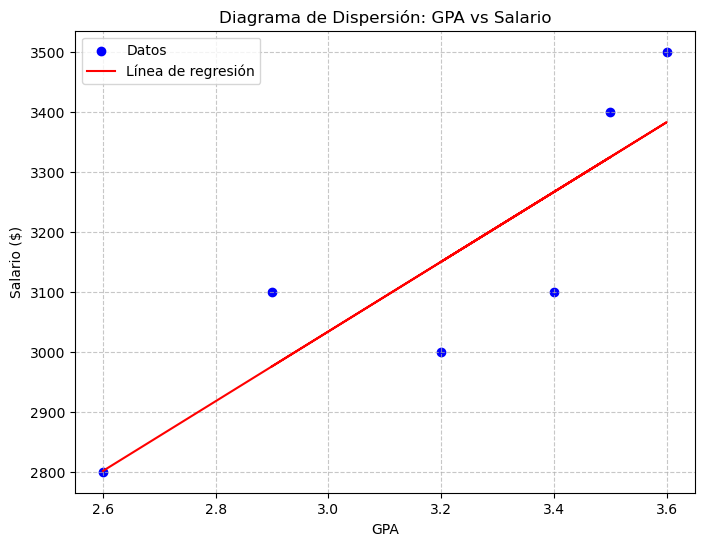

In [20]:
# Datos
gpa = np.array([2.6, 3.4, 3.6, 3.2, 3.5, 2.9]).reshape(-1, 1)  # Variable independiente (GPA)
salario = np.array([2800, 3100, 3500, 3000, 3400, 3100])  # Variable dependiente (Salario)

# a. Ecuación de regresión estimada
modelo = LinearRegression()
modelo.fit(gpa, salario)

# Coeficientes de la ecuación de regresión
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

print("a. Ecuación de regresión estimada:")
print(f"Salario = {intercepto:.2f} + {pendiente:.2f} * GPA")

# b. Coeficiente de determinación R²
r2 = r2_score(salario, modelo.predict(gpa))
print("\nb. Coeficiente de determinación R²:")
print(f"R² = {r2:.4f}")

# Comentario sobre la bondad del ajuste
if r2 > 0.7:
    print("   Comentario: El modelo de regresión explica una gran cantidad de la variabilidad en los datos.")
elif r2 > 0.5:
    print("   Comentario: El modelo de regresión explica una cantidad moderada de la variabilidad en los datos.")
else:
    print("   Comentario: El modelo de regresión no explica bien la variabilidad en los datos.")

# c. Coeficiente de correlación muestral
correlacion = np.corrcoef(gpa.flatten(), salario)[0, 1]
print("\nc. Coeficiente de correlación muestral:")
print(f"r = {correlacion:.4f}")

# Diagrama de dispersión con la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(gpa, salario, color='blue', label='Datos')
plt.plot(gpa, modelo.predict(gpa), color='red', label='Línea de regresión')
plt.title("Diagrama de Dispersión: GPA vs Salario")
plt.xlabel("GPA")
plt.ylabel("Salario ($)")
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()